In [12]:
import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib import dates as mdates
from scipy.interpolate import make_smoothing_spline

In [2]:
filename = 'sample_time_series.csv'
df = pd.read_csv(filename, index_col=0, parse_dates=True)
df

,Price
2024-10-21 09:00:03,23510.0
2024-10-21 09:00:09,23545.0
2024-10-21 09:00:16,23520.0
2024-10-21 09:00:22,23500.0
2024-10-21 09:00:27,23540.0
...,...
2024-10-21 11:29:37,23760.0
2024-10-21 11:29:41,23755.0
2024-10-21 11:29:48,23760.0
2024-10-21 11:29:56,23755.0


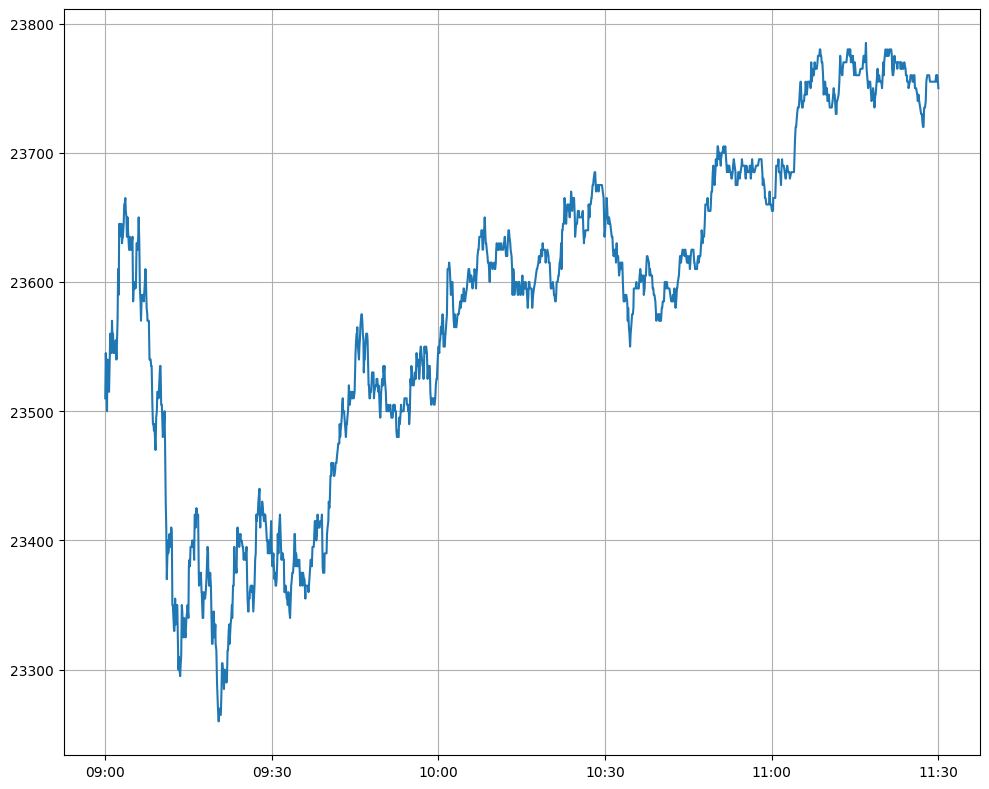

In [13]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))

ax.plot(df)
ax.grid()

plt.tight_layout()
plt.savefig('sample_time_series_raw.png')
plt.show()

In [4]:
delta = 9 * 60 * 60  # 時差
x = np.array([t.timestamp() - delta for t in df.index])
y = df['Price'].values
spl = make_smoothing_spline(x, y, lam=10 ** 6)

n = len(df)
ts1 = x[0]
ts2 = x[n - 1]
xs = np.linspace(ts1, ts2, int(ts2 - ts1) + 1)
ys = spl(xs)
dt_index = pd.to_datetime([str(datetime.datetime.fromtimestamp(t)) for t in xs])

dfs = pd.DataFrame({'Price': ys}, index=dt_index)
dfs

,Price
2024-10-21 09:00:03,23509.726692
2024-10-21 09:00:04,23510.308007
2024-10-21 09:00:05,23510.889322
2024-10-21 09:00:06,23511.470637
2024-10-21 09:00:07,23512.051953
...,...
2024-10-21 11:29:56,23758.209146
2024-10-21 11:29:57,23758.307549
2024-10-21 11:29:58,23758.405927
2024-10-21 11:29:59,23758.504287


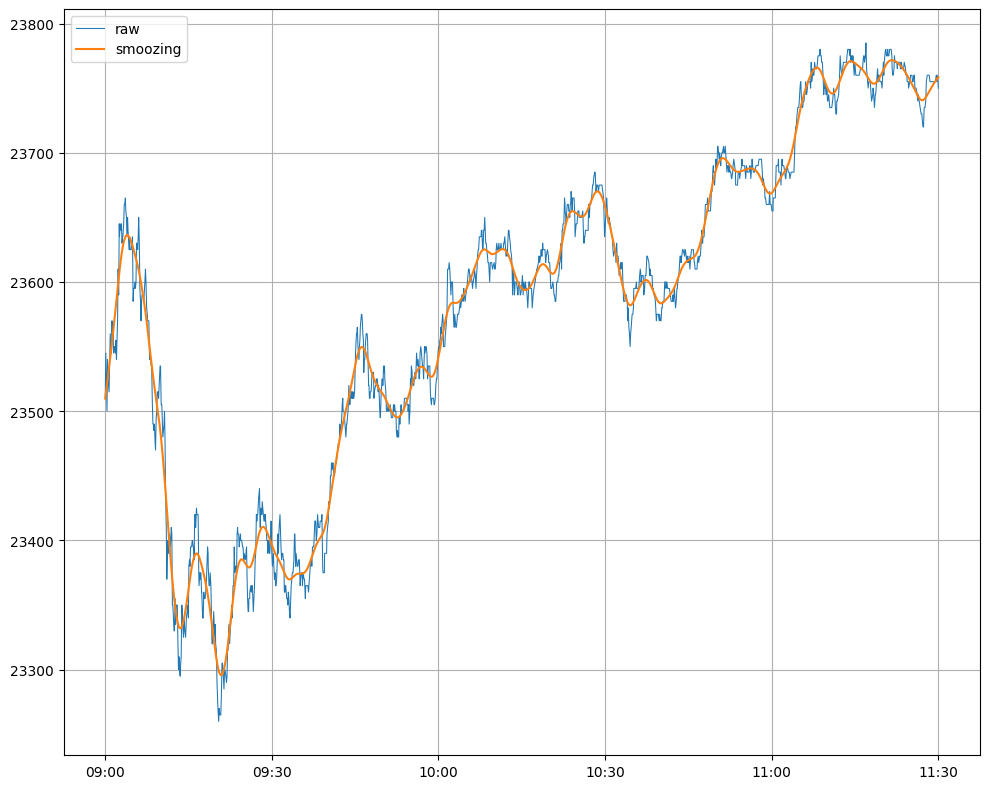

In [14]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

ax.plot(df, lw=0.75, label='raw')
ax.plot(dfs, label='smoozing')
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))

ax.grid()
ax.legend()

plt.tight_layout()
plt.savefig('sample_time_series_smoothing.png')
plt.show()